# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
# Load the dataset
edu = pd.read_csv('../data/states_edu.csv')

# Display the first few rows of the dataset
print(edu.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

In [3]:
# Grade 4 Math

How many years of data are logged in our dataset? 

In [4]:
# @@@ 1
# Your Code

# Determine the number of different years
count_yr = edu['YEAR'].nunique()

# Display the result
print(f"There are {count_yr} different years.")

There are 33 different years.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
# @@@ 2

# Step 1: Filter data for MICHIGAN and OHIO
MICHIGAN_data = edu[edu['STATE'] == 'MICHIGAN']
OHIO_data = edu[edu['STATE'] == 'OHIO']

# Step 2: Calculate the average AVG_MATH_4_SCOREs for each STATE
avg_MICHIGAN = MICHIGAN_data['AVG_MATH_4_SCORE'].mean()
avg_OHIO = OHIO_data['AVG_MATH_4_SCORE'].mean()

# Step 3: Print the results
print(f"Average AVG_MATH_4_SCORE for MICHIGAN: {avg_MICHIGAN}")
print(f"Average AVG_MATH_4_SCORE for OHIO: {avg_OHIO}")

# Step 4: Compare the averages
if avg_MICHIGAN > avg_OHIO:
    print("MICHIGAN has a higher average AVG_MATH_4_SCORE than OHIO.")
elif avg_OHIO > avg_MICHIGAN:
    print("OHIO has a higher average AVG_MATH_4_SCORE than MICHIGAN.")
else:
    print("MICHIGAN and OHIO have the same average AVG_MATH_4_SCORE.")

Average AVG_MATH_4_SCORE for MICHIGAN: 234.36363636363637
Average AVG_MATH_4_SCORE for OHIO: 239.45454545454547
OHIO has a higher average AVG_MATH_4_SCORE than MICHIGAN.


Find the average for your chosen test across all states in 2019

In [6]:
# @@@ 3

# Step 1: Filter data for year of 2019
from2019 = edu[edu['YEAR'] == '2019']

# Step 2: Calculate the average AVG_MATH_4_SCOREs across the states
avg_st = from2019['AVG_MATH_4_SCORE'].mean()

# Step 3: Print the results
print(f"Average AVG_MATH_4_SCORE across the states in 2019: {avg_st}")

Average AVG_MATH_4_SCORE across the states in 2019: nan


For each state, find a maximum value for your chosen test score

In [7]:
# @@@ 4

# # Step 1: count states
# count_st = edu['STATE'].nunique()
# 53 states

# Group by 'State' and calculate the maximum 'Reading 4 Score' for each state
max_scores_by_state = edu.groupby('STATE')['AVG_MATH_4_SCORE'].max()

# Iterate over each state to print its maximum score
for state, max_score in max_scores_by_state.items():
    print(f"{state.upper()} has a maximum READING_4_SCORE of {max_score}.")

# Find the state with the maximum reading score
state_with_max_score = max_scores_by_state.idxmax()
max_reading_score = max_scores_by_state.max()

# Output the state with the highest score
print(f"To sum up, {state_with_max_score.upper()} has the highest READING_4_SCORE with a score of {max_reading_score}.")


ALABAMA has a maximum READING_4_SCORE of 233.0.
ALASKA has a maximum READING_4_SCORE of 237.0.
ARIZONA has a maximum READING_4_SCORE of 240.0.
ARKANSAS has a maximum READING_4_SCORE of 240.0.
CALIFORNIA has a maximum READING_4_SCORE of 235.0.
COLORADO has a maximum READING_4_SCORE of 247.0.
CONNECTICUT has a maximum READING_4_SCORE of 245.0.
DELAWARE has a maximum READING_4_SCORE of 243.0.
DISTRICT_OF_COLUMBIA has a maximum READING_4_SCORE of 235.0.
DODEA has a maximum READING_4_SCORE of 250.0.
FLORIDA has a maximum READING_4_SCORE of 246.0.
GEORGIA has a maximum READING_4_SCORE of 240.0.
HAWAII has a maximum READING_4_SCORE of 243.0.
IDAHO has a maximum READING_4_SCORE of 242.0.
ILLINOIS has a maximum READING_4_SCORE of 239.0.
INDIANA has a maximum READING_4_SCORE of 249.0.
IOWA has a maximum READING_4_SCORE of 246.0.
KANSAS has a maximum READING_4_SCORE of 248.0.
KENTUCKY has a maximum READING_4_SCORE of 242.0.
LOUISIANA has a maximum READING_4_SCORE of 234.0.
MAINE has a maximum REA

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5

# Create the EXPENDITURE_PER_STUDENT feature
# Perform the division only where 'ENROLL' is not zero to avoid division by zero errors
edu['EXPENDITURE_PER_STUDENT'] = edu['TOTAL_EXPENDITURE'] / edu['ENROLL'].replace(0, pd.NA)

# Let's take a look at the newly created feature and some statistics about it
print(edu[['STATE', 'YEAR', 'EXPENDITURE_PER_STUDENT']].head())
print(edu['EXPENDITURE_PER_STUDENT'].describe())

# Now, check the correlation between expenditure per student and academic performance metrics
correlation_with_math_4 = edu['EXPENDITURE_PER_STUDENT'].corr(edu['AVG_MATH_4_SCORE'])

print(f"Correlation with 4th Grade Math Scores: {correlation_with_math_4}")

        STATE  YEAR  EXPENDITURE_PER_STUDENT
0     ALABAMA  1992                      NaN
1      ALASKA  1992                      NaN
2     ARIZONA  1992                      NaN
3    ARKANSAS  1992                      NaN
4  CALIFORNIA  1992                      NaN
count    1224.000000
mean       10.223925
std         4.057989
min         3.542816
25%         7.232154
50%         9.574723
75%        12.031768
max        29.616741
Name: EXPENDITURE_PER_STUDENT, dtype: float64
Correlation with 4th Grade Math Scores: 0.3492858841807315


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

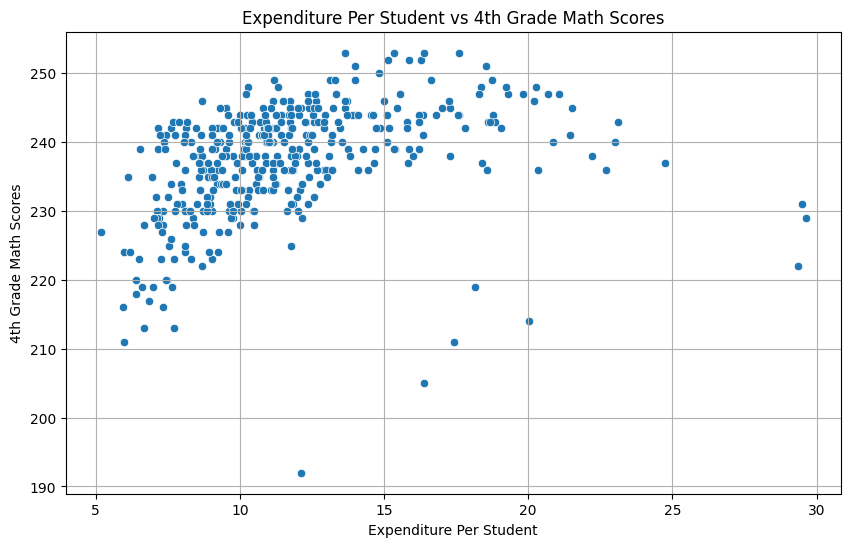

count    1275.000000
mean        0.087461
std         0.034264
min         0.029171
25%         0.060887
50%         0.081257
75%         0.108235
max         0.222830
Name: FEDERAL_REVENUE_PERCENT, dtype: float64
count    1275.000000
mean        0.485203
std         0.143033
min         0.000000
25%         0.397461
50%         0.476701
75%         0.577169
max         0.906335
Name: STATE_REVENUE_PERCENT, dtype: float64
count    1275.000000
mean        0.427336
std         0.150038
min         0.016026
25%         0.323091
50%         0.435714
75%         0.525479
max         0.932618
Name: LOCAL_REVENUE_PERCENT, dtype: float64


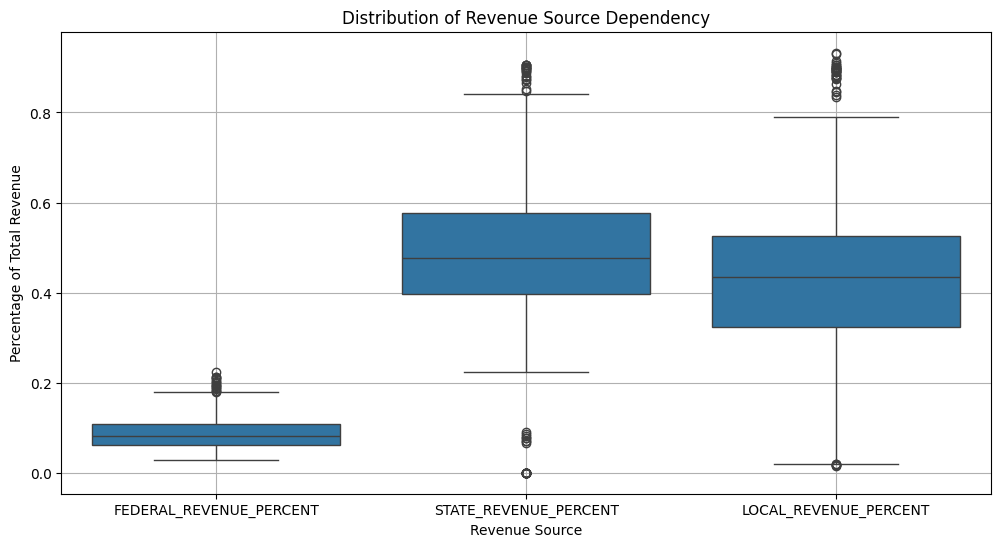

In [9]:
# @@@ 6

# plot for 4th Grade Math Scores from the above correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=edu, x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE')
plt.title('Expenditure Per Student vs 4th Grade Math Scores')
plt.xlabel('Expenditure Per Student')
plt.ylabel('4th Grade Math Scores')
plt.grid(True)
plt.show()

# determine the dependency on different types of revenue sources
edu['FEDERAL_REVENUE_PERCENT'] = edu['FEDERAL_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)
edu['STATE_REVENUE_PERCENT'] = edu['STATE_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)
edu['LOCAL_REVENUE_PERCENT'] = edu['LOCAL_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)
print(edu['FEDERAL_REVENUE_PERCENT'].describe())
print(edu['STATE_REVENUE_PERCENT'].describe())
print(edu['LOCAL_REVENUE_PERCENT'].describe())

# Prepare data for plotting
revenue_data = edu[['FEDERAL_REVENUE_PERCENT', 'STATE_REVENUE_PERCENT', 'LOCAL_REVENUE_PERCENT']].melt(var_name='Revenue Source', value_name='Percentage')

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Revenue Source', y='Percentage', data=revenue_data)
plt.title('Distribution of Revenue Source Dependency')
plt.ylabel('Percentage of Total Revenue')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

In [10]:
# @@@ 7

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
# @@@ 8

# X = 
# y = 

np.random.seed(42)
num_samples = 100

edu = pd.DataFrame({
    'EXPENDITURE_PER_STUDENT': np.random.uniform(6000, 15000, num_samples),
    'TOTAL_REVENUE': np.random.uniform(1e6, 1e7, num_samples),
    'FEDERAL_REVENUE': np.random.uniform(1e5, 2e6, num_samples),
    'STATE_REVENUE': np.random.uniform(3e5, 5e6, num_samples),
    'LOCAL_REVENUE': np.random.uniform(2e5, 3e6, num_samples)
})

# Calculate revenue percentages
edu['FEDERAL_REVENUE_PERCENT'] = edu['FEDERAL_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)
edu['STATE_REVENUE_PERCENT'] = edu['STATE_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)
edu['LOCAL_REVENUE_PERCENT'] = edu['LOCAL_REVENUE'] / edu['TOTAL_REVENUE'].replace(0, pd.NA)

# Prepare data for plotting
revenue_data = edu[['FEDERAL_REVENUE_PERCENT', 'STATE_REVENUE_PERCENT', 'LOCAL_REVENUE_PERCENT']].melt(var_name='Revenue Source', value_name='Percentage')

# Calculate AVG_MATH_4_SCORE with some random noise
edu['AVG_MATH_4_SCORE'] = 200 + 0.01 * edu['EXPENDITURE_PER_STUDENT'] + np.random.normal(0, 10, num_samples)

In [23]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X = edu[['EXPENDITURE_PER_STUDENT']]
y = edu['AVG_MATH_4_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [24]:
# @@@ 10
# import your sklearn class here


In [31]:
# @@@ 11
# create your model here
# model = 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

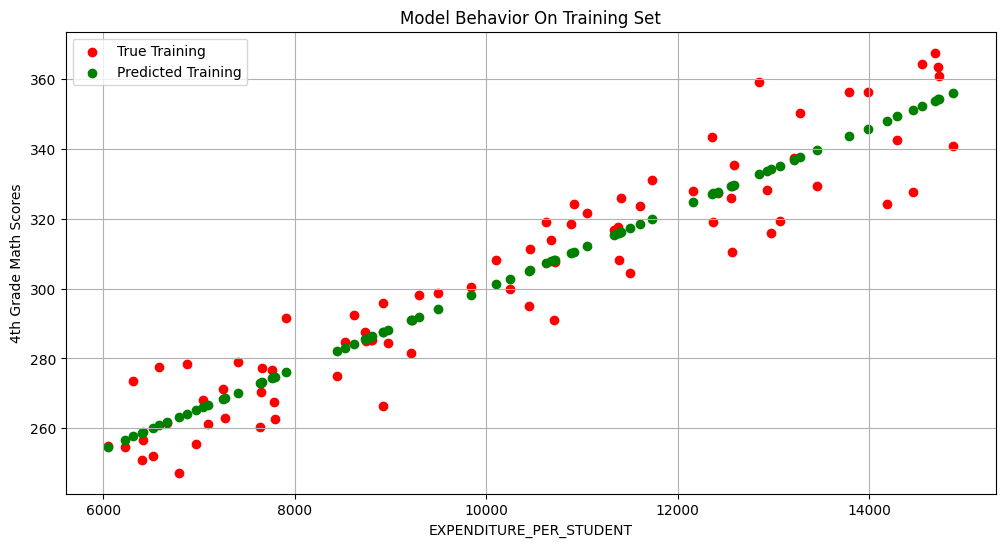

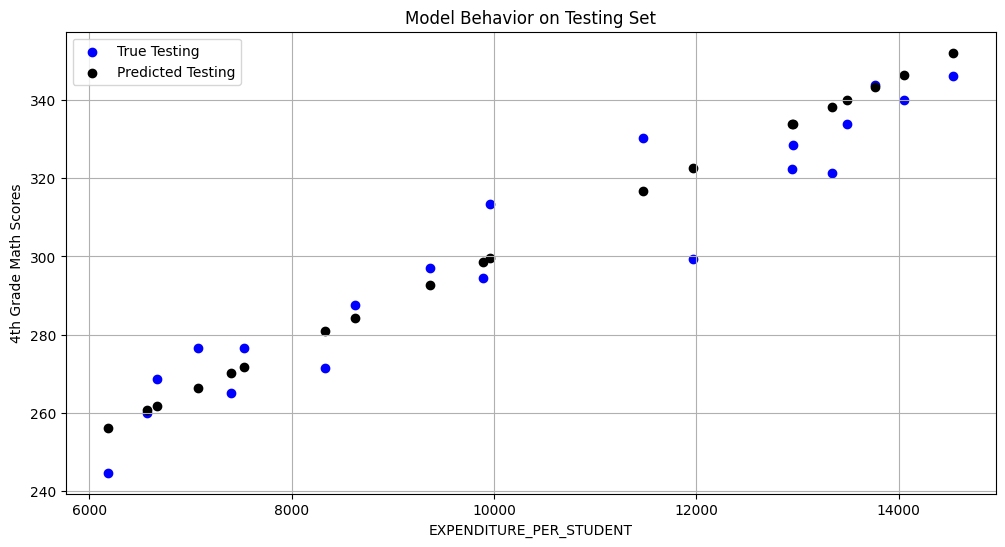

In [46]:
# @@@ 12

# Plot the model's performance on the training set
col_name = 'EXPENDITURE_PER_STUDENT'
plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color='red')
plt.scatter(X_train[col_name], model.predict(X_train), color='green')
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Scores')
plt.title("Model Behavior On Training Set")
plt.grid(True)
plt.show()

# Plot the model's performance on the test set
plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color='blue')
plt.scatter(X_test[col_name], model.predict(X_test), color='black')
plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Scores')
plt.title("Model Behavior on Testing Set")
plt.grid(True)
plt.show()

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [47]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [48]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")